In [16]:
import numpy as np
import pandas as pd
import os
from os import path
from glob import glob
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import *
from processing import *
#from analysis import *
import subspaceMSI
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from skimage.metrics import structural_similarity as ssim
import pickle
from numpy.linalg import svd
from pyIMS.pyImagingMSpec.image_measures import measure_of_chaos
from scipy.signal import medfilt
import matplotlib
sys.path.append("../..")

matplotlib.rcParams.update({'font.size': 14})
from skimage import io
from skimage.transform import rescale,resize
from skimage import color
import cv2 as cv
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [ ]:
def load_data(file):
    with open(file, 'rb') as fp:
        data = pickle.load(fp)
        mz = data['mz']
        print(mz.shape)
        peak_data = data['peak_data']
        coord = []
        if 'coordinates' in data.keys():
            coord = data['coordinates']
    #intens_mtx = intens_mtx/tic.reshape(-1,1)
    return mz,peak_data,coord

def pklist2imzML_3D(input_dir,out_dir,peak_list_name):

    """
    """
    idx = 0
    with ImzMLWriter(out_dir+peak_list_name+'.imzML') as w:
        mz,peak_list,coord = load_data(input_dir+peak_list_name+'.pkl')
        coords=list(coord)
        names=[peak_list_name]*len(coord)
        print('writing '+peak_list_name)

        for i in range(1,len(peak_list)+1):

            if peak_list[i]['mz'].size >0:
                w.addSpectrum(mzs = peak_list[i]['mz'],intensities = peak_list[i]['intensity'],
                                        coords = tuple([1,idx]))
                idx+=1
    return coord

In [ ]:
np.l

In [23]:
input_dir = 'E:/3DCoronal/decoded_data_new/'
out_dir = 'E:/3DCoronal/imzml/'
# slice_order = ['slide1_2_R00','slide1_2_R01','slide1_2_R02','slide1_2_R03','slide1_2_R04','slide1_2_R05','slide1_2_R06',
#               'slide1_2_R07','slide1_2_R08','slide3_5_R00','slide3_5_R10','slide3_5_R01','slide3_5_R02','slide3_5_R03',
#               'slide3_5_R04','slide4_6_R00','slide4_6_R11','slide4_6_R01','slide4_6_R02','slide4_6_R03','slide4_6_R04',
#               'slide3_5_R05','slide3_5_R06','slide3_5_R07','slide3_5_R08','slide3_5_R11','slide3_5_R09','slide4_6_R05',
#               'slide4_6_R06','slide4_6_R07','slide4_6_R08','slide4_6_R09','slide4_6_R10','slide7_R00','slide7_R01',
#               'slide7_R02','slide7_R03']
slice_order = ['slide1_2_R00','slide1_2_R01','slide1_2_R02','slide1_2_R03','slide1_2_R04','slide1_2_R05','slide1_2_R06',
              'slide1_2_R07','slide1_2_R08','slide3_5_R00','slide3_5_R10','slide3_5_R01','slide3_5_R02','slide3_5_R03',
              'slide3_5_R04','slide4_6_R00','slide4_6_R11','slide4_6_R01','slide4_6_R02','slide4_6_R03','slide4_6_R04',
              'slide3_5_R05','slide4_6_R05','slide4_6_R06','slide4_6_R07','slide4_6_R08']

In [ ]:
intens_mtxs = []
mz_set = []
mz_list = []
peak_list_names = ['coronal3D_latent32_epoch10_{}_propagated_decoded'.format(slice) for slice in slice_order]

coords= []
names = []
for peak_list_name in peak_list_names:
    coord = pklist2imzML_3D(input_dir,out_dir,peak_list_name)
    coords+=list(coord)
    names+=[peak_list_name]*len(coord)

In [19]:
feat_count = []
for peak_list_name in peak_list_names:
    imzml_data = loadimzMLData(out_dir+peak_list_name+'.imzml')
    intens_array, mz_bins, mz_bins_use, c = extractMZFeatures(imzml_data, ppm=3, mz_range=(400,1100), feature_n=0.2)
    feat_count.append(c)

c:\users\richard\appdata\local\programs\python\python38\lib\site-packages\pyimzml\ontology\ontology.py:86: UserWarning: Accession IMS:1000491 found with incorrect name "line scan left right". Updating name to "linescan left right".
  warn(


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 490/168602 [00:00<01:09, 2436.07it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:06<00:00, 2519.64it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 459/168602 [00:00<01:13, 2283.09it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2333.44it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 492/168602 [00:00<01:08, 2447.25it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:07<00:00, 2480.46it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 231/168602 [00:00<01:13, 2293.23it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:09<00:00, 2413.90it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 475/168602 [00:00<01:11, 2367.54it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2331.73it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 242/168602 [00:00<01:10, 2402.47it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2328.27it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 216/168602 [00:00<01:18, 2143.71it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2321.07it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 460/168602 [00:00<01:13, 2286.64it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:15<00:00, 2242.26it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 461/168602 [00:00<01:13, 2289.17it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:15<00:00, 2235.89it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 467/168602 [00:00<01:12, 2322.70it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2317.86it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 214/168602 [00:00<01:19, 2124.47it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2314.34it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 449/168602 [00:00<01:15, 2227.86it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:15<00:00, 2223.97it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 236/168602 [00:00<01:11, 2342.91it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:14<00:00, 2254.01it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 392/168602 [00:00<01:25, 1973.89it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:15<00:00, 2220.12it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 433/168602 [00:00<01:17, 2171.30it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:17<00:00, 2177.34it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 217/168602 [00:00<01:18, 2154.32it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:18<00:00, 2141.75it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 463/168602 [00:00<01:13, 2302.36it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:12<00:00, 2310.14it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 212/168602 [00:00<01:20, 2104.62it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:21<00:00, 2059.84it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 199/168602 [00:00<01:25, 1975.57it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:22<00:00, 2054.23it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 425/168602 [00:00<01:19, 2119.21it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:21<00:00, 2057.96it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 458/168602 [00:00<01:13, 2282.23it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:16<00:00, 2202.14it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|                                                                           | 229/168602 [00:00<01:14, 2273.37it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:10<00:00, 2380.77it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▎                                                                          | 662/168602 [00:00<00:50, 3312.28it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [00:49<00:00, 3435.56it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 332/168602 [00:00<00:51, 3295.11it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [00:52<00:00, 3214.95it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▏                                                                          | 320/168602 [00:00<00:52, 3176.81it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [00:52<00:00, 3214.85it/s]


TODO: convert indices into real world coordinates
loaded spectra
file loaded


  0%|▎                                                                          | 672/168602 [00:00<00:50, 3334.08it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [00:52<00:00, 3196.49it/s]


In [66]:
intens_array

array([[ 51875.171875  , 200730.046875  , 124571.09375   , ...,
         18684.91210938,  33605.54296875,  21476.77539062],
       [127430.1171875 , 291195.59375   , 207051.109375  , ...,
         22857.7265625 ,  23130.24804688,  24455.01953125],
       [150280.46875   , 333886.25      , 254090.765625  , ...,
         18481.84179688,  27831.8046875 ,  16739.65820312],
       ...,
       [ 11906.33203125,  10431.38085938,   1426.66589355, ...,
         14659.8046875 ,  25396.32421875,  21191.22460938],
       [  6716.46972656,  12637.10351562,   2672.64624023, ...,
          8692.16601562,  17318.24414062,  19486.91601562],
       [  2624.6237793 ,   3274.52880859,   7275.13378906, ...,
          2101.62084961,  11362.51855469,  24910.5078125 ]])

(array([ 507.,  445.,  237.,  240.,  234.,  175.,  286.,  250.,  200.,
        1532.]),
 array([0.20000196, 0.28000177, 0.36000157, 0.44000137, 0.52000118,
        0.60000098, 0.68000079, 0.76000059, 0.84000039, 0.9200002 ,
        1.        ]),
 <BarContainer object of 10 artists>)

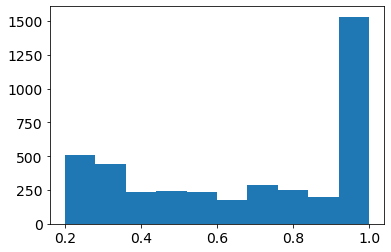

In [65]:
feat_freq = np.array(feat_count).sum(0)/len(coords)
mz_use = np.array(mz_bins)[np.array(n).astype(bool).sum(0)==26]
plt.hist(feat_freq[(feat_freq>0.2)])

In [15]:
intens_array, mz_bins, mz_bins_use, c = extractMZFeatures(imzml_data, ppm=3, mz_range=(400,1100), feature_n=0.2)

  0%|                                                                           | 234/168602 [00:00<01:12, 2322.34it/s]

number of mass bins 168602


100%|████████████████████████████████████████████████████████████████████████| 168602/168602 [01:09<00:00, 2441.03it/s]


In [1]:
import umap

In [2]:
def extractMZFeatures(imzml_dataset, ppm, mz_range, feature_n = 0.05, mz_bins = []):
        
    if len(mz_bins) == 0:
        mz_bins = [mz_range[0]]
        while mz_bins[-1] < mz_range[1]:
            mz_bins.append(mz_bins[-1]+mz_bins[-1]*2*ppm*10**-6)
        
    print('number of mass bins {}'.format(len(mz_bins)))

    count = []
    for i in tqdm(range(len(mz_bins))):
        count.append(imzml_dataset.get_ion_image(mz_bins[i],ppm).xic_to_image(0).astype(bool).sum())
    
    mz_bins_filter = (np.array(count)>=int(imzml_dataset.coords.shape[0]*feature_n))
    mz_bins_use = np.array(mz_bins)[mz_bins_filter]
                
    datacube = imzml_dataset.get_ion_image(mz_bins_use, ppm)
    
    datacube_array = [datacube.xic_to_image(i) for i in range(len(mz_bins_use))]
    datacube_array = np.concatenate(datacube_array,axis=1)
        
    return datacube_array, mz_bins, mz_bins_use, count

(array([2929., 1803.,  705., 1030.,  802.,  740.,  625.,  531.,  472.,
         462.,  405.,  333.,  296.,  282.,  290.,  251.,  219.,  186.,
         182.,  186.,  213.,  171.,  135.,  159.,  183.,  182.,  186.,
         154.,  208.,  187.,  202.,  163.,  159.,   82.,  546.,  288.,
        1096.,    0.,    0.,    0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41]),
 <BarContainer object of 40 artists>)

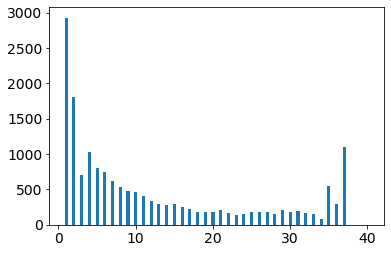

In [14]:
from collections import Counter
mz_count = Counter(mz_list)
count_keys = list(mz_count.keys())
count_values = list(mz_count.values())
plt.hist(np.array(count_values),bins=np.arange(1,42),rwidth=0.4,align='left')

In [18]:
sum(c)

104265280

In [13]:
total_mz = set(mz_set[0])
for s in mz_set[1:]:
    total_mz = total_mz | (s)
common_mz = sorted(list(set.intersection(*mz_set)))
print(len(total_mz),len(common_mz))

17043 1096


In [4]:
mz_use = np.load('mz_use_imzml.npy')

In [8]:
#common_mz = sorted(list(set.intersection(*mz_set)))
import h5py

hf = h5py.File(input_dir+'coronal3D_propagated_decoded_new.h5', 'w')

for slice in slice_order:
    group = hf.create_group(slice)
    peak_list_name = 'coronal3D_latent32_epoch10_{}_propagated_decoded'.format(slice)
    mz,peak_list,coord = load_data(input_dir+peak_list_name+'.pkl')
    imzml_data = loadimzMLData(out_dir+peak_list_name+'.imzml')
    #mz,intens_mtx,coord = load_data(input_dir+'coronal3D_latent32_epoch10_{}_propagated_decoded.pkl'.format(slice))
    intens_mtx, mz_bins, mz_bins_use, c = extractMZFeatures(imzml_data, ppm=3, mz_range=(400,1100), feature_n=0.2,mz_bins=mz_use)
    print(intens_mtx.shape)
    idx_use = np.where(np.in1d(mz_bins,mz_use))[0]
    group.create_dataset('mz',data=mz_bins_use)
    group.create_dataset('mz_common',data=mz_use)
    group.create_dataset('mz_use_idx',data=idx_use)
    group.create_dataset('coordinates',data=coord)
    group.create_dataset('intensity matrix',data=intens_mtx)
hf.close()

(3365,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 33%|█████████████████████████▌                                                   | 384/1156 [00:00<00:00, 1917.64it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1917.63it/s]


(39872, 1156)
(3373,)
TODO: convert indices into real world coordinates
loaded spectra


  0%|                                                                                         | 0/1156 [00:00<?, ?it/s]

file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1355.63it/s]


(42652, 1156)
(3426,)
TODO: convert indices into real world coordinates
loaded spectra


  0%|                                                                                         | 0/1156 [00:00<?, ?it/s]

file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1429.21it/s]


(41297, 1156)
(3413,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 25%|██████████████████▉                                                          | 284/1156 [00:00<00:00, 1416.71it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1434.52it/s]


(43140, 1156)
(3446,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1495.60it/s]


(40197, 1156)
(3397,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1583.41it/s]


(43580, 1156)
(3292,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 14%|██████████▍                                                                  | 157/1156 [00:00<00:00, 1558.67it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1583.47it/s]


(44282, 1156)
(3295,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1547.58it/s]


(45726, 1156)
(3151,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1572.71it/s]


(46473, 1156)
(4235,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1270.24it/s]


(44496, 1156)
(4748,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 24%|██████████████████▌                                                          | 278/1156 [00:00<00:00, 1340.93it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1393.16it/s]


(45183, 1156)
(4279,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 20%|███████████████▎                                                             | 229/1156 [00:00<00:00, 1141.08it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 1119.90it/s]


(46686, 1156)
(4228,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 11%|████████▋                                                                    | 130/1156 [00:00<00:00, 1290.58it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1347.74it/s]


(46496, 1156)
(4243,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 19%|██████████████▍                                                              | 217/1156 [00:00<00:00, 1080.44it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 1067.43it/s]


(46514, 1156)
(4120,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 10%|███████▌                                                                     | 113/1156 [00:00<00:00, 1122.09it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1201.16it/s]


(48909, 1156)
(3758,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


  8%|██████                                                                         | 88/1156 [00:00<00:01, 865.05it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 937.77it/s]


(45454, 1156)
(4355,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 15%|███████████▌                                                                  | 171/1156 [00:00<00:01, 853.20it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 830.88it/s]


(47595, 1156)
(3773,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 15%|███████████▋                                                                  | 174/1156 [00:00<00:01, 867.21it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 874.77it/s]


(47951, 1156)
(3880,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


  7%|█████▌                                                                         | 82/1156 [00:00<00:01, 813.85it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 816.82it/s]


(47652, 1156)
(3766,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 15%|███████████▍                                                                  | 170/1156 [00:00<00:01, 849.00it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 827.33it/s]


(45871, 1156)
(3664,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


  7%|█████▎                                                                         | 78/1156 [00:00<00:01, 759.30it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 824.39it/s]


(45083, 1156)
(3836,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


  6%|████▊                                                                          | 71/1156 [00:00<00:01, 697.87it/s]

number of mass bins 1156


100%|█████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 803.80it/s]


(43221, 1156)
(3735,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 21%|████████████████▌                                                            | 248/1156 [00:00<00:00, 1232.76it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1191.23it/s]


(32292, 1156)
(3844,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156

 18%|█████████████▋                                                               | 206/1156 [00:00<00:00, 1022.59it/s]

100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:01<00:00, 1044.20it/s]


(33809, 1156)
(3792,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded
number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1190.18it/s]


(33139, 1156)
(3594,)
TODO: convert indices into real world coordinates
loaded spectra
file loaded


 10%|███████▊                                                                     | 117/1156 [00:00<00:00, 1159.75it/s]

number of mass bins 1156


100%|████████████████████████████████████████████████████████████████████████████| 1156/1156 [00:00<00:00, 1181.54it/s]


(33224, 1156)


In [6]:
hf.close()

In [23]:
adducts = ['M+H','M+Na','M+K']
site_url = 'https://www.lipidmaps.org/rest/moverz/LIPIDS'

#mz_use = model.VAE_model('../processed_data/sagittal3D_propagated.h5').mz_use

annot_df, matched, unmatched = LipidMaps_annotate(common_mz, adducts, 5, site_url)

annot_df['ppm'] = annot_df['Delta']/annot_df['Input m/z']*1e6

176.00867948321147
177.01631855981685
206.05600996619262
211.46493427166553
222.03018190706544
229.05009923456748
229.93870917116175
240.123887462625
245.04537008753064
248.1742700875448
258.11083881449673
264.26943822242305
268.09372532460577
273.04037357595774
274.04371658384764
277.0625821292389
297.07012688912897
299.46947512232595
300.0884680635351
302.0565722356037
302.0796358336604
302.77666103876555
307.04518188194476
307.45679841348317
310.9034608815433
310.99633222805033
313.03257768824744
315.0191396798216
329.00729283283954
330.0103780396322
331.0306773780757
332.2287967998378
339.2905956151836
341.305882423752
346.0481366212232
347.00879291181474
347.7606844670991
348.0712347864085
358.04602581122754
361.2747495926853
361.74878842208284
366.9631102190264
367.2202760914836
367.2867549958641
367.2935747060007
367.9665594686645
368.29712023792604
368.72791000904095
369.35271034356884
371.24510621728695
372.25638006762364
373.3048777429325
377.2975554591003
379.2870005686788
3

721.9574450754088
722.4320458300068
722.498011956775
723.4955668525969
725.3925449727802
725.4923114155706
725.512267997336
725.5588376247398
726.3981144205931
726.5648684887458
728.3908182768535
728.4645837133043
729.5257745613457
729.5930425822697
730.4686570898006
730.5765703057333
730.596807583445
731.5424624721818
731.6101029334073
732.4227652111414
732.5244749548161
732.6126462518711
733.4275385182062
733.4751298624352
734.5441608205402
734.5714379877678
734.9535311554807
735.547929288971
735.5752810580516
736.3214005291514
736.4173420928083
736.4379042522188
736.9797880031605
737.0553034269996
737.4537317220393
737.5499686139516
737.9833456406805
738.4310147969626
738.4585814086392
738.5206138108251
739.3487094803123
739.5283750403964
739.5767614575218
739.7565378837944
740.5042379899278
740.5596833140615
740.6428668700379
742.0459336102962
742.4079798913768
742.4428106527707
742.4706776151036
742.5194498332128
742.5751973576873
743.00054764896
743.5241876617038
744.461597540103

908.5656494393694
908.6073824669186
909.5473902056169
911.4437515989208
911.5697567653989
911.674787687672
912.5053836155654
912.6001045089013
913.4640237376773
913.5062079814785
913.6011367769217
913.7066363584247
914.4563845911638
914.614939565914
915.6203992987928
916.2247369535297
916.4900490808844
916.7236508874493
916.7873811400239
917.5315560144505
917.637965344571
918.4688059493957
918.5860968417174
918.6394207873026
919.4720766643784
919.5255035248616
919.5896239536871
919.7499641560194
920.4775415808629
921.5496019431379
921.5818023372675
922.5596181364027
923.5071737586159
924.6835526703227
925.6896240710007
926.6436235464131
926.9367222651492
927.4147621082259
927.5343491210315
929.6048208088529
931.530995496799
932.4860897920063
932.5630215964497
933.487194365226
934.9873638974468
936.5034470276042
938.469476957354
938.580798481439
939.6173549585387
939.7066280620834
942.5274401761518
942.7408071689764
943.5952420454879
944.5414211713354
945.4894997419995
945.5459930101218

<AxesSubplot:>

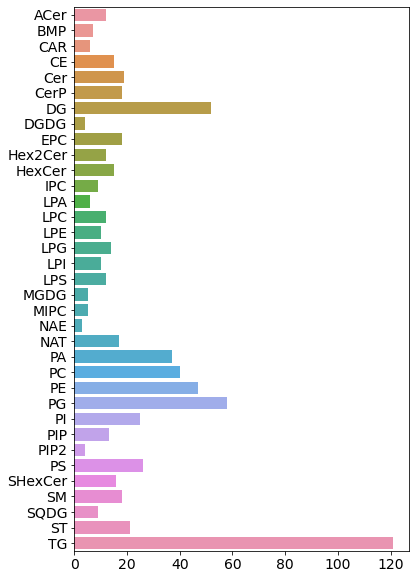

In [28]:
annot_hist = np.unique([name.split(' ')[0] for name in annot_df[(annot_df['ppm']<1)]['Name'].unique()], return_counts=True)
#annot_hist2 = np.unique([name.split(' ')[0] for name in annot_df2[annot_df2['ppm']<2]['Name'].unique()], return_counts=True)

plt.figure(figsize=(6,10))
sns.barplot(y=annot_hist[0],x=annot_hist[1])

In [29]:
index = []
for i in range(annot_df['Input m/z'].shape[0]):
    print(mz,np.where(common_mz==annot_df['Input m/z'][i]))
    index.append(np.where(common_mz[::-1]==annot_df['Input m/z'][i])[0][0])
annot_df['index'] = index

[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([32], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([32], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([33], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([33], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([39], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([39], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([59], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([59], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  

  152.11903562] (array([198], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([198], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([199], dtype=int6

  152.11903562] (array([302], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([302], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([303], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([303], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([303], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([303], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([304], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([305], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([305], dtype=int6

  152.11903562] (array([373], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([373], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([373], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([374], dtype=int6

  152.11903562] (array([443], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([443], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([444], dtype=int6

  152.11903562] (array([513], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([513], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([513], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([513], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([513], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([514], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([514], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([514], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([514], dtype=int6

  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([610], dtype=int6

  152.11903562] (array([701], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([702], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([703], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([703], dtype=int6

[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([770], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([772], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([772], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([773], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([773], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([773], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([773], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([773], dtype=int64),)
[1099.92410519 1099.58782394 1099.496146

  152.11903562] (array([856], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([857], dtype=int6

  152.11903562] (array([949], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([949], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([949], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([949], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([952], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([952], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([952], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([952], dtype=int64),)
[1099.92410519 1099.58782394 1099.49614656 ...  152.12137527  152.12020544
  152.11903562] (array([952], dtype=int6

In [31]:
# with open('../Coronal3D_annotation_decoded.pkl', 'wb') as f:
#     pickle.dump(annot_df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
groups_show = ['slide1_2_R03','slide3_5_R03','slide3_5_R06']
avg_spec_recon = []
avg_spec_orig = []
for group in groups_show:
    with open('/Volumes/Housecats2/3DCoronal/decoded_data_new/coronal3D_latent32_epoch10_{}_avgsp_decoded.pkl'.format(group), 'rb') as fp:
        avg_spec_recon.append(pickle.load(fp))
    with open('../processed_data/coronal3D_latent32_epoch10_{}_avgspec_orig_zeropad.pkl'.format(group), 'rb') as fp:
        avg_spec_orig.append(pickle.load(fp))
# avg_spec_recon=np.stack(avg_spec_recon)
# avg_spec_orig=np.stack(avg_spec_orig)

In [19]:
np.where(np.array(slice_order)=='slide3_5_R06')

NameError: name 'slice_order' is not defined

In [4]:
recon_ = subspaceMSI.Subspace(out_dir='../processed_data/')
recon_.experimentInfo('../file_dir_coronal_3D_slide3_5.json', if_simu = False, sampling_pattern = 'grid')

loaded parameters for the experiment...
{'project_name': 'coronal3D_latent32_epoch10_slide3_5', 'pixel_num_HR': 4000, 'fid_length_HR': 1048576, 'sw_h': 1428571.4285714286, 'n_basis': 150, 'fid_length_LR': 65536, 'CALIB': [107798997.08328888, 6.277444864073617, 0], 'T': 7e-07, 't_HR': array([0.000000e+00, 7.000000e-07, 1.400000e-06, ..., 7.340011e-01,
       7.340018e-01, 7.340025e-01]), 't_LR': array([0.00000e+00, 7.00000e-07, 1.40000e-06, ..., 4.58731e-02,
       4.58738e-02, 4.58745e-02]), 'f_HR': array([1.00000000e-01, 1.36239188e+00, 2.72478376e+00, ...,
       7.14282990e+05, 7.14284352e+05, 7.14285714e+05]), 'f_LR': array([1.00000000e-01, 2.17982701e+01, 4.35965402e+01, ...,
       7.14242118e+05, 7.14263916e+05, 7.14285714e+05]), 'm_HR': array([1.69031641e+07, 1.41101179e+07, 1.19747011e+07, ...,
       1.50917845e+02, 1.50917557e+02, 1.50917270e+02]), 'm_LR': array([1.69031641e+07, 3.83958155e+06, 2.16142739e+06, ...,
       1.50926481e+02, 1.50921875e+02, 1.50917270e+02])}


In [8]:
recon_.imaginginfo_LR['R03']['scan_index']

array([137679, 137680, 137681, ..., 184190, 184191, 184192], dtype=int64)

In [5]:
def getSpectraSerFile(ser_file_path,ROI,fid_length,fid_idx,mz_range,mz_axis,zero_pad=False,pad_length=0,signal_size='all'):
    
    fid_loaded = loadBrukerFIDs(ser_file_path, fid_length, signal_size, fid_idx)
    if zero_pad:
        pad_length = pad_length - fid_loaded.shape[1]
        fid_loaded = np.pad(fid_loaded,[(0,0),(0,pad_length)])
    mz, sp = fid2spec(fid_loaded, mz_axis, mz_range)
    
    return mz, sp

In [6]:
slice_order[23]

'slide3_5_R07'

In [14]:
with open('F:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R06_peak_list_decoded.pkl', 'rb') as fp:
    peak_list = pickle.load(fp)
with open('F:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R06_encoded_pred.pkl', 'rb') as fp:
    encodings = pickle.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: 'F:/3DCoronal/decoded_data/coronal3D_latent32_epoch10_slide3_5_R06_peak_list_decoded.pkl'

In [17]:
from tensorflow import keras
decoder = keras.models.load_model('../saved_model/coronal3D_latent32_epoch10_decoder')

ModuleNotFoundError: No module named 'tensorflow'

In [24]:
recon_.ProcSerFile(ROI='R03',mz_range=(150,1100),mz_index=peak_list['mz_index'],zero_pad=True)

100%|████████████████████████████████████████████████████████████████████████████████| 432/432 [33:45<00:00,  4.69s/it]


In [102]:
mz,intens_mtx,coord = load_data(input_dir+'coronal3D_latent32_epoch10_slide3_5_R03_propagated_decoded.pkl')

(6283,)


In [101]:
mz,intens_mtx_lr,_ = load_data('../processed_data/coronal3D_latent32_epoch10_slide3_5_R03_propagated_orig_zeropad.pkl')

(6283,)


In [166]:
mz[(mz>810)&(mz<814)]

array([813.96078759, 813.91055116, 813.68456396, 813.60089684,
       813.55906973, 813.48379177, 813.45033937, 813.41688973,
       813.25804146, 812.90712324, 812.72342978, 812.70673449,
       812.68169284, 812.60657715, 812.55650774, 812.52313156,
       812.49810122, 812.47307243, 812.44804518, 812.41467791,
       812.37297268, 812.21453183, 812.08115589, 811.99781817,
       811.89783548, 811.71459781, 811.68961727, 811.60635988,
       811.581386  , 811.54808988, 811.47318359, 811.42325375,
       811.19032903, 810.88274069, 810.84950187, 810.79134049,
       810.68334862, 810.65843151, 810.60029753, 810.54217189,
       810.48405459, 810.45084844, 810.39274424, 810.2599659 ,
       810.24337166, 810.17700153, 810.16041069])

NameError: name 'intens_mtx' is not defined

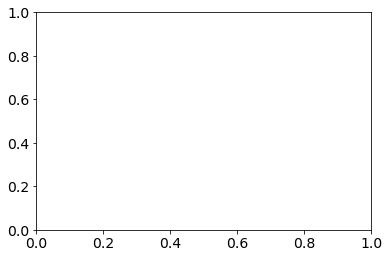

In [24]:
fig,ax=plt.subplots()
ax.pcolorfast((intens_mtx[:,(mz>810)&(mz<814)]/intens_mtx[:,(mz>810)&(mz<814)].max(1).reshape(-1,1)),cmap='hot')

NameError: name 'intens_mtx_lr' is not defined

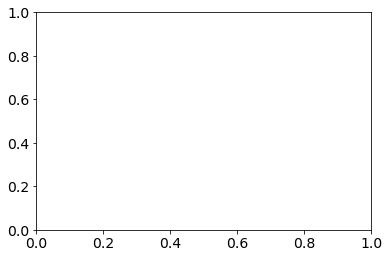

In [25]:
fig,ax=plt.subplots()
ax.pcolorfast((intens_mtx_lr[:,(mz>810)&(mz<814)]/intens_mtx_lr[:,(mz>810)&(mz<814)].max(1).reshape(-1,1)),cmap='hot')

In [26]:
mz_HR = np.load('../processed_data/mz_raw_3d.npy')
mz_HR = mz_HR[(mz_HR>150)&(mz_HR<1100)]
mz_filter = (mz_HR>700)&(mz_HR<900)
mz_filter_HR = (mz_HR>788)&(mz_HR<795)
mz_filter_HR2 = (mz_HR>844.4)&(mz_HR<844.8)
# mz_LR = recon_.parameters['m_LR']
# mz_LR = mz_LR[(mz_LR>150)&(mz_LR<1100)]
# mz_filter_LR = (mz_LR>700)&(mz_LR<875)
# mz_filter_LR2 = (mz_LR>810)&(mz_LR<814)

No handles with labels found to put in legend.


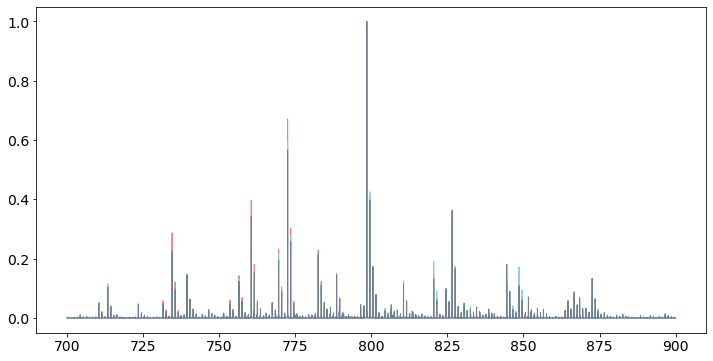

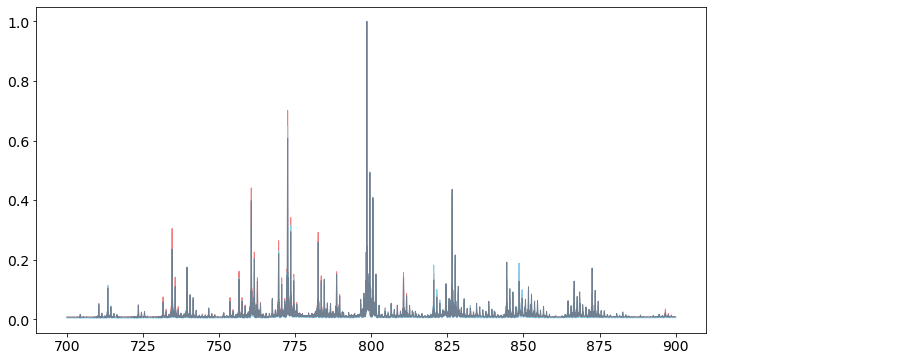

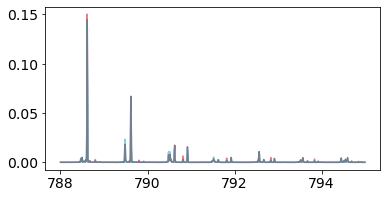

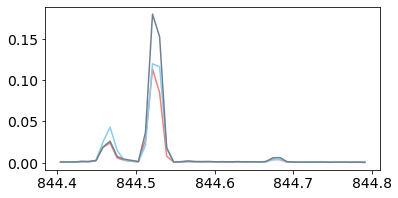

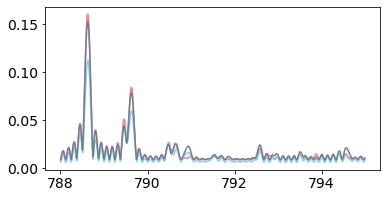

In [27]:
import matplotlib
cmap = matplotlib.cm.get_cmap('rainbow')
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=4.0)
colors = ['lightcoral','skyblue','slategrey']
plt.figure(figsize=(12,6))
for i,color in zip([0,1,2],colors):
    plt.plot(mz_HR[mz_filter],avg_spec_recon[i][mz_filter]/avg_spec_recon[i][mz_filter].max(),linewidth=1,label=slice_order[i],c=color)
#plt.savefig('../figures/avg_spec_decoded_3d.pdf')
plt.figure(figsize=(12,6))
for i,color in zip([0,1,2],colors):
    plt.plot(mz_HR[mz_filter],avg_spec_orig[i][mz_filter]/avg_spec_orig[i][mz_filter].max(),linewidth=1,c=color)
plt.legend(frameon=False,fontsize=12,ncol=1,loc='lower center',bbox_to_anchor=(1.3, .3))
#plt.savefig('../figures/avg_spec_raw_3d.pdf')
plt.figure(figsize=(6,3))
for i,color in zip([0,1,2],colors):
    plt.plot(mz_HR[mz_filter_HR],avg_spec_recon[i][mz_filter_HR]/avg_spec_recon[i][mz_filter].max(),linewidth=1.5,label=slice_order[i],c=color)
#plt.savefig('../figures/avg_spec_decoded_3d_detail_2.pdf')
plt.figure(figsize=(6,3))
for i,color in zip([0,1,2],colors):
    plt.plot(mz_HR[mz_filter_HR2],avg_spec_recon[i][mz_filter_HR2]/avg_spec_recon[i][mz_filter].max(),linewidth=1.5,label=slice_order[i],c=color)
#plt.savefig('../figures/avg_spec_decoded_3d_detail_2_2.pdf')
plt.figure(figsize=(6,3))
for i,color in zip([0,1,2],colors):
    plt.plot(mz_HR[mz_filter_HR],avg_spec_orig[i][mz_filter_HR]/avg_spec_orig[i][mz_filter].max(),linewidth=1.5,label=slice_order[i],c=color)
#plt.savefig('../figures/avg_spec_raw_3d_detail_2.pdf')


In [10]:
from tqdm import tqdm
with open('../Coronal3D_annotation_decoded.pkl', 'rb') as fp:
    annot_df = pickle.load(fp)

In [9]:
ser_file_path = recon_.ser_file_path_LR
ROI = 'R06'
fid_length = recon_.parameters['fid_length_LR']
pad_length = recon_.parameters['fid_length_HR']
mz_range = (150,1100)
mz_axis = recon_.parameters['m_HR']
# fid_idx = 592
scan_idx = recon_.imaginginfo_LR[ROI]['scan_index']

# noise_std_raw = []
# noise_std_decode = []
# signal_raw = []
# signal_decode = []

# for i in tqdm(range(scan_idx.size)):
#     mz,sp = getSpectraSerFile(ser_file_path,ROI,fid_length,scan_idx[i],(150,1100),mz_axis,True,pad_length)
#     decoded_HR = decoder(encodings[i].reshape(1,-1))
#     mz,sp_decoded = fid2spec(np.array(decoded_HR),mz_axis,(150,1100))
#     noise_std_raw.append(np.std(sp[0][(mz<1100)&(mz>1070)]))
#     noise_std_decode.append(np.std(sp_decoded[0][(mz<1100)&(mz>1070)]))
#     signal_raw_ = []
#     signal_decode_ = []
#     for idx in [375,374,383,305,303,302]:
#         mz_in = annot_df[annot_df['index']==idx]['Input m/z'].unique()[0]
#         signal_raw_.append(sp[0][np.where(mz==mz_in)[0]])
#         signal_decode_.append(sp_decoded[0][np.where(mz==mz_in)[0]])
#     signal_raw.append(signal_raw_)
#     signal_decode.append(signal_decode_)

In [55]:
spec_lr = []
spec_decode = []

for i in tqdm(range(scan_idx.size)):
    mz,sp = getSpectraSerFile(ser_file_path,ROI,fid_length,scan_idx[i],(810,814),mz_axis,True,pad_length)
    decoded_HR = decoder(encodings[i].reshape(1,-1))
    mz,sp_decoded = fid2spec(np.array(decoded_HR),mz_axis,(810,814))
    spec_lr.append(sp)
    spec_decode.append(sp_decoded)

100%|██████████████████████████████████████████████████████████████████████████| 30231/30231 [2:16:06<00:00,  3.70it/s]


In [27]:
np.stack(spec_lr,1).shape

(1, 80, 4597)

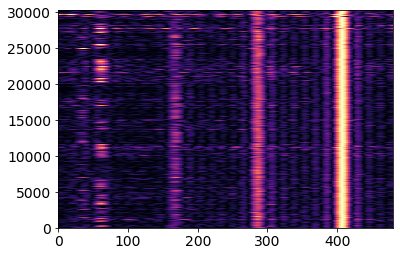

In [65]:
fig,ax=plt.subplots()
ax.pcolorfast((np.stack(spec_lr,1)[0]/np.stack(spec_lr,1)[0].max(1).reshape(-1,1)),cmap='magma')

In [60]:
np.stack(spec_decode,1)[0].max(1).shape

(30231,)

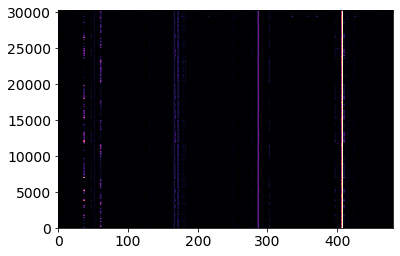

In [64]:
fig,ax=plt.subplots()
ax.pcolorfast((np.stack(spec_decode,1)[0]/np.stack(spec_decode,1)[0].max(1).reshape(-1,1)),cmap='magma')

In [135]:
noise_stats = {'noise_std_raw':noise_std_raw,'noise_std_decode':noise_std_decode,'signal_raw':signal_raw,'signal_decode':signal_decode}

In [136]:
with open('../noise_stats_slide3_5_R06.pkl', 'wb') as fp:
    pickle.dump(noise_stats, fp, protocol=pickle.HIGHEST_PROTOCOL)

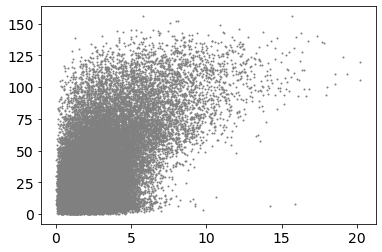

In [38]:
plt.scatter((np.stack(signal_raw)[:,1,0]/noise_std_raw),
            (np.stack(signal_decode)[:,1,0]/noise_std_decode),s=1,c='grey')

In [84]:
snr_raw = pd.DataFrame({'0':np.stack(signal_raw)[:,0,0]/noise_std_raw,'1':np.stack(signal_raw)[:,1,0]/noise_std_raw,
                       '2':np.stack(signal_raw)[:,2,0]/noise_std_raw,'3':np.stack(signal_raw)[:,3,0]/noise_std_raw,
                       '4':np.stack(signal_raw)[:,4,0]/noise_std_raw,'5':np.stack(signal_raw)[:,5,0]/noise_std_raw,'type':['raw']*len(noise_std_raw)})
snr_decode = pd.DataFrame({'0':np.stack(signal_decode)[:,0,0]/noise_std_decode,'1':np.stack(signal_decode)[:,1,0]/noise_std_decode,
                       '2':np.stack(signal_decode)[:,2,0]/noise_std_decode,'3':np.stack(signal_decode)[:,3,0]/noise_std_decode,
                       '4':np.stack(signal_decode)[:,4,0]/noise_std_decode,'5':np.stack(signal_decode)[:,5,0]/noise_std_decode,'type':['decode']*len(noise_std_decode)})

In [85]:
snr = pd.concat((snr_raw,snr_decode))

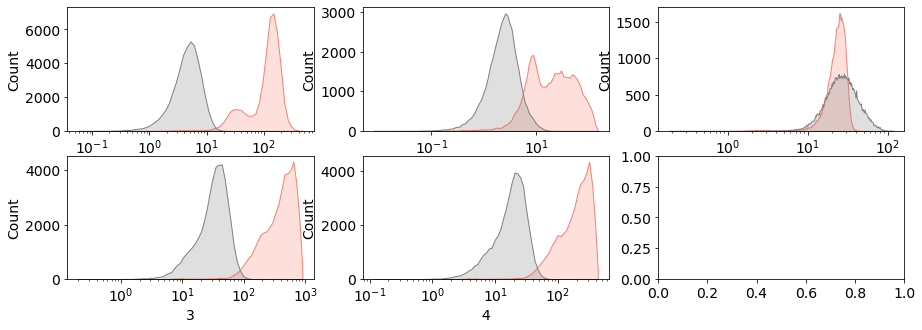

In [132]:
fig,axes = plt.subplots(2,3,figsize=(15,5))
ax = axes.ravel()
for i in range(5):
    sns.histplot(x=str(i),hue='type',data=snr,log_scale=True,element='poly',palette=['grey','salmon'],ax=ax[i],legend=False)

fig.savefig('../figures/snr_dist.pdf')


In [10]:
mz,sp = getSpectraSerFile(ser_file_path,ROI,fid_length,scan_idx[4129],(150,1100),mz_axis,True,pad_length)
decoded_HR = decoder(encodings[4129].reshape(1,-1))
mz,sp_decoded = fid2spec(np.array(decoded_HR),mz_axis,(150,1100))

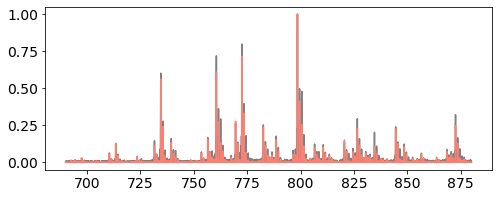

In [11]:
mz_HR = recon_.parameters['m_HR']
mz_HR = mz_HR[(mz_HR>150)&(mz_HR<1100)]
mz_filter = (mz_HR>690)&(mz_HR<880)
mz_filter_HR = (mz_HR>810)&(mz_HR<814)
mz_filter_HR2 = (mz_HR>813.4)&(mz_HR<813.8)
mz_LR = recon_.parameters['m_LR']
mz_LR = mz_LR[(mz_LR>150)&(mz_LR<1100)]
mz_filter_LR = (mz_LR>700)&(mz_LR<875)
mz_filter_LR2 = (mz_LR>810)&(mz_LR<814)


plt.figure(figsize=(8,3))
plt.plot(mz[mz_filter],sp[0][mz_filter]/sp[0][mz_filter].max(),linewidth=1.5,c='gray')
plt.plot(mz[mz_filter],sp_decoded[0][mz_filter]/sp_decoded[0][mz_filter].max(),linewidth=1.5,c='salmon')

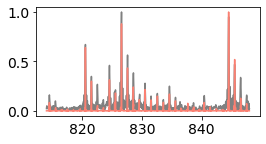

In [88]:
plt.figure(figsize=(4,2))
 
plt.plot(mz[mz_filter_HR],sp[0][mz_filter_HR]/sp[0][mz_filter_HR].max(),linewidth=1.5,c='gray')
plt.plot(mz[mz_filter_HR],sp_decoded[0][mz_filter_HR]/sp_decoded[0][mz_filter_HR].max(),linewidth=1.5,c='salmon')
plt.savefig('../figures/')

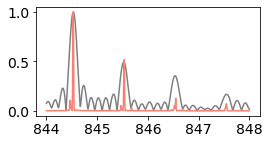

In [80]:
plt.figure(figsize=(4,2))
 
plt.plot(mz[mz_filter_HR],sp[0][mz_filter_HR]/sp[0][mz_filter_HR].max(),linewidth=1.5,c='gray')
plt.plot(mz[mz_filter_HR],sp_decoded[0][mz_filter_HR]/sp_decoded[0][mz_filter_HR].max(),linewidth=1.5,c='salmon')
